무비렌즈
100만개 데이터셋
-> 6000명, 4000편, 100만개 영화평점 -> 평점, 사용자 정보, 영화정보

In [105]:
import pandas as pd
unames=['user_id', 'gender', 'age', 'occupation', 'zip']
rnames=['user_id', 'movie_id', 'rating', 'timestamp']
mnames=['movie_id', 'title', 'genres']

users=pd.read_csv("data/movielens/users.dat", names=unames, sep="::",header=None)
# users #UserID::Gender::Age::Occupation::Zip-code

ratings=pd.read_csv("data/movielens/ratings.dat", names=rnames, sep="::",header=None)
# ratings #UserID::MovieID::Rating::Timestamp

movies=pd.read_csv("data/movielens/movies.dat", names=mnames, sep="::",header=None)
# movies #MovieID::Title::Genres

# 수치데이터가 아니기 때문에 전처리과정에서 수치데이터로 수정해줘야 함
# 상관계수

C:\Users\B-8\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\B-8\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\B-8\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


In [106]:
# users.columns=['user_id', 'gender', 'age', 'occupation', 'zip']
users[:5]
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [107]:
ratings[:5] #user_id 기준열

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [108]:
# 데이터 합칠때는 merge, concat 함수
# pd.merge(왼쪽, 오른쪽, on=기준변수, left_on, right_on...)
data=pd.merge(pd.merge(ratings, users), movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [109]:
# data의 0번 행 추출
# iloc(정수 위치), loc(라벨), ix
data.iloc[0]
data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [110]:
# 성별에 따른 각 영화의 평균 평점
mean_ratings=data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [111]:
import nltk
nltk.download('punkt')
# nltk.download()
# 자연어처리: 데이터를 (토큰화->정제->정규화)
# 토큰화: 문장을 단어로 나누는 작업 (how are you?)-> How, are, you
# 정제: 특수문자, 구두점 모두 제거하는 작업
# ex) Don't, Don t - > Do not
from nltk.tokenize import word_tokenize
# print(word_tokenize("How ard you?"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\B-8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
# 영어의 경우 nltk를 사용해서 영어문장을 토큰화 할 수 있음

print(word_tokenize("How ard you?"))
print(word_tokenize("Clean Slate (Coup de Torchon) (1981)"))


['How', 'ard', 'you', '?']
['Clean', 'Slate', '(', 'Coup', 'de', 'Torchon', ')', '(', '1981', ')']


In [113]:
#영화 제목으로 그룹화 -> size를 구해서 제목별 평점 정보 건수를 추출
ratings_by_title=data.groupby('title').size()
ratings_by_title[:10]

# 250건 이상의 평점 정보가 있는 영화만 추출
active_titles= ratings_by_title.index[ratings_by_title>=250]#부울링 추출
active_titles

# mean_ratings에서 active_titles추출
mean_ratings.loc[active_titles] #mean_ratings.ix[active_titles]와 같음

# 여성에게 높은 평점을 받은 영화 목록을 출력(상위 10개)
top_female_ratings=mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

C:\Users\B-8\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  del sys.path[0]


gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J�t�kos) (1997)",5.0,3.166667
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
Ayn Rand: A Sense of Life (1997),5.0,4.000000


In [114]:
# 남녀간 평균 평점의 차이가 가장 큰 영화가 무엇인지 조사(상위 15개)
# F              M              diff(M-F)

mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']
# mean_ratings['diff']

sorted_by_diff=mean_ratings.sort_values(by="diff")
sorted_by_diff[:15]


gender,F,M,diff
title,,,
"James Dean Story, The (1957)",4.000000,1.000000,-3.000000
Country Life (1994),5.000000,2.000000,-3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,-3.000000
Babyfever (1994),3.666667,1.000000,-2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,-2.571429
Cobra (1925),4.000000,1.500000,-2.500000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.000000,2.928571,-2.071429
"To Have, or Not (1995)",4.000000,2.000000,-2.000000
For the Moment (1994),5.000000,3.000000,-2.000000


In [115]:
sorted_by_diff[::-1][:15]
# 역순으로 정렬한 다음 상위 15개 행으로 남성들이 선호하는 순으로 확인

gender,F,M,diff
title,,,
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000,NaN
Zachariah (1971),NaN,3.500000,NaN
Year of the Horse (1997),NaN,3.250000,NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3.000000,NaN
With Friends Like These... (1998),NaN,4.000000,NaN
With Byrd at the South Pole (1930),NaN,2.000000,NaN
Wings of Courage (1995),NaN,3.000000,NaN
Windows (1980),NaN,1.000000,NaN
Wild Bill (1995),NaN,3.146341,NaN


In [116]:
rating_ste_by_title=data.groupby('title')['rating'].std() #영화 제목별 rating에 대한 표준편차
# 표준편차가 크다 = 호불호가 잘 구분된다
rating_ste_by_title.sort_values(ascending=False)[:10]

title
Foreign Student (1994)                                             2.828427
Criminal Lovers (Les Amants Criminels) (1999)                      2.309401
Identification of a Woman (Identificazione di una donna) (1982)    2.121320
Sunset Park (1996)                                                 2.121320
Eaten Alive (1976)                                                 2.121320
Neon Bible, The (1995)                                             2.121320
Talk of Angels (1998)                                              2.121320
Tokyo Fist (1995)                                                  2.121320
Paralyzing Fear: The Story of Polio in America, A (1998)           2.121320
Better Living (1998)                                               2.121320
Name: rating, dtype: float64

In [117]:
# 이름 데이터 분석
# 1) 시대별로 특정 이름이 차지하는 비율 - > 얼마나 흔한 이름인지 확인 가능
# 2) 이름의 상대 순위
# 3) 각 연도별로 가장 인기 있는 이름, 빈도가 높거나 낮은 이름 확인
# 4) 모음, 자음, 길이, 다양성, 철자 변화, 첫 글자 마지막 글자, 이름 유행 분석
# 자연어 분석을 잘 해야 함

In [118]:
names1880=pd.read_csv("data/babynames/yob1880.txt", names=['name', 'sex', 'births'])
names1880 #최소 5명 이상의 정보가 부여된 이름만 나옴
# 성별 출생수의 합
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [119]:
years=range(1880, 2011)
pieces=[]
for year in years:
    path="data/babynames/yob%d.txt" % year                   #data/babynames/yob1880.txt
    frame=pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year']=year  # year이라는 컬럼 추가
    pieces.append(frame)
len(pieces)
 
#     print(frame)
#     print(year, "="*50)
    

131

In [120]:
names=pd.concat(pieces,ignore_index=True) #데이터프레임 합치기
# 기존의 인덱스를 무시하고, 합쳐놓은 것을 인덱스로 지정
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


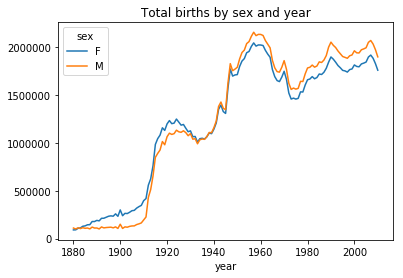

In [121]:
# 연도별, 성별 출생수의 합을 출력(피봇으로)
total_births=names.pivot_table('births',index='year', columns='sex', aggfunc=sum)
total_births

# -> year와 sex에 대한 기준으로 birth의 합을 구한다


# 시각화하기
total_births.plot(title="Total births by sex and year")

In [152]:
# prop열 추가 : 각 이름이 전체 출생수에서 차지하는 비율
 # ex) prop값이 0.02 -> 100명 중 2명이 같은 이름의 아기
    
def add_prop(group):
    births=group.births.astype(float) # 타입이 float으로 변경(데이터 형변환 완료)
    group['prop']=(births/births.sum())
    return group
    print(births)   # 0.077643이면 100명중에 7명은 'Mary'
    
names=names.groupby(['year','sex']).apply(add_prop) # 그룹단위 함수
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [153]:
# 각 연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
pieces=[]
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
    top1000=pd.concat(pieces,ignore_index=True)
top1000
#     print(year,group) # F라는 그룹으로 출력
#     print("="*50)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [154]:
boys=top1000[top1000.sex=="M"] # 남자만 추출
girls=top1000[top1000.sex=="F"] # 여자만 추출
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [155]:
# john과 Mary이름이 해마다 어떤 추이로 변화되는지 시각화
# 연도와 이름에 대한 전체 출생수를 피벗
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc='sum')
total_births # 131 rows × 6868 columns : 6868개의 이름

# 각 해년마다 1000등하는 이름을 조사 -> 그 결과를 다 합친 것임

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [156]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


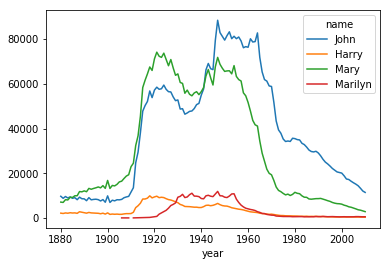

In [157]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014029E8AB70>,
      dtype=object)

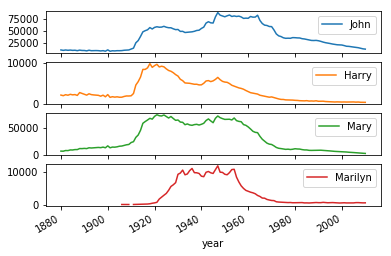

In [158]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True) # 각각 출력

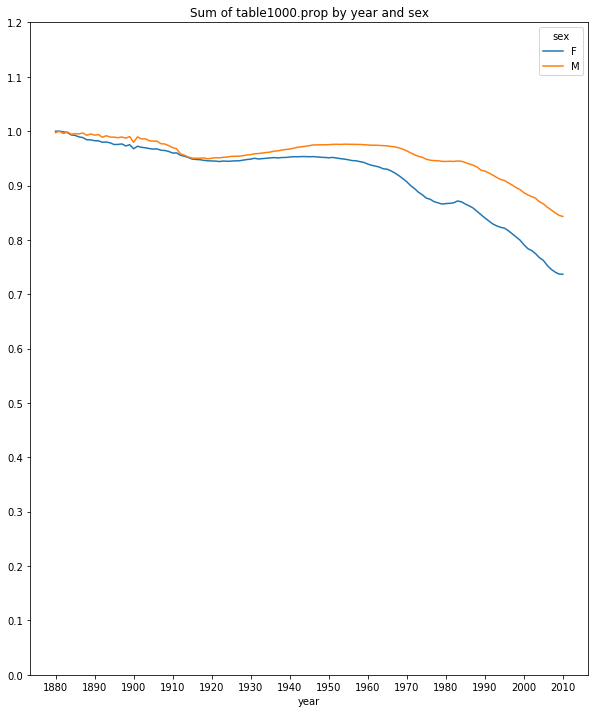

In [159]:
# 이름 1000개가 전체 출생수에서 차지하는 비율을 시각화
import numpy as np
table=top1000.pivot_table('prop',index='year',columns='sex',aggfunc='sum')
table.plot(title="Sum of table1000.prop by year and sex",
           figsize=(10,12), xticks=range(1880,2011,10),yticks=np.linspace(0,1.2,13))
# x축 10년 단위로 설정, y는 0부터 1.2씩 증가 13개로 나타냄

# 1880년에는 이름의 종류가 다양하지 않았음, 여성의 이름이 남성보다 다양하다
# -> 이름의 다양성이 높아지고 있음을 확인할 수 있었음

In [160]:
df=boys[boys.year==2010]
# df에 저장된 이름을 정렬했을 때, 전체 출생수의 50%를 차지하기까지 등장하는 이름의 개수를 출력
# prop 컬럼 값을 누적해서 0.5가 되면 멈추고, 그 때까지 세었던 이름의 갯수를 구하겠다!

In [168]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
# 오름차순 -> ascending으로 내림차순, cumsum() : 데이터프레임에 있는 prop 값을 누적
prop_cumsum[:117] # 50% 넘어가는 시점

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
260887    0.097648
260888    0.105406
260889    0.112852
260890    0.120276
260891    0.127672
260892    0.135023
260893    0.142368
260894    0.149603
260895    0.156827
260896    0.164021
260897    0.170722
260898    0.177191
260899    0.183452
260900    0.189655
260901    0.195815
260902    0.201832
260903    0.207769
260904    0.213578
260905    0.219354
260906    0.225070
            ...   
260964    0.442569
260965    0.444972
260966    0.447374
260967    0.449727
260968    0.452058
260969    0.454381
260970    0.456626
260971    0.458819
260972    0.461006
260973    0.463067
260974    0.465079
260975    0.467082
260976    0.469054
260977    0.471025
260978    0.472971
260979    0.474916
260980    0.476847
260981    0.478747
260982    0.480626
260983    0.482490
260984    0.484342
260985    0.

In [180]:
prop_cumsum.values.searchsorted(0.5)+1 # 50%를 넘겼을 때 서로 다른 이름의 개수
# searchsorted : 0.5가 막 넘은 시점의 index를 리턴 -> (1을 더해서) 117

117

In [182]:
# 1900년에 대해서도 50%를 넘겼을 때 서로 다른 이름의 개수
df2=boys[boys.year==1900]
in1900=df2.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1


array([25], dtype=int64)

In [183]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


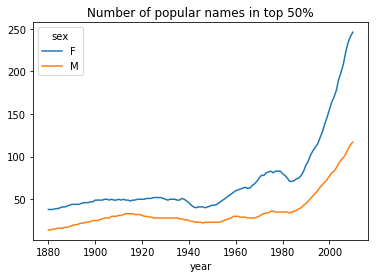

In [190]:
# [문제]  top1000에 대해 연도와 성별을 그룹화를 하고, 각 그룹에 대해 연산을 적용

# sex     F    M
# year
# 1880   38   14
# 1881   ..   ..
# ...    ..   ..
# 2010

# x축은 year, y축은 인원수, 범례는 성별로 시각화

def get_quantile_count(group,q=0.5):
    group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity
diversity=diversity.unstack('sex')
diversity
diversity.plot(title="Number of popular names in top 50%")

# 1980년대부터 다양해짐
# 주제 : 댜양성을 높이는 요인에 대한 분석(대체 되는 철자의 증가 등)

In [201]:
# 이름에서 마지막 글자를 추출
get_last_letter=lambda x:x[-1] # x에는 이름이 전달
# myname='gildong'
# get_last_letter(myname)

# names의 마지막 글자 추출
last_letters=names.name.map(get_last_letter)
last_letters

last_letters.name='last_letter'
last_letters

table=names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)
table

# last_letters 는 마지막 글자만 가지고 있으니 가로축 인덱스에 알파벳

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [206]:
# 50년 단위로 재지정하여 비교
subtable=table.reindex(columns=[1910,1960,2010],level='year')
print(subtable)
print("="*50)
print(subtable.sum())

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l     

In [222]:
# 성별의 마지막 글자가 차지하는 비율?
letter_prop=subtable/subtable.sum().astype(float)
# F라는 성별의 비율을 396416.0으로 나누겠다

letter_prop
# 1910년은 a와 e로 끝나는 이름이 많았음

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

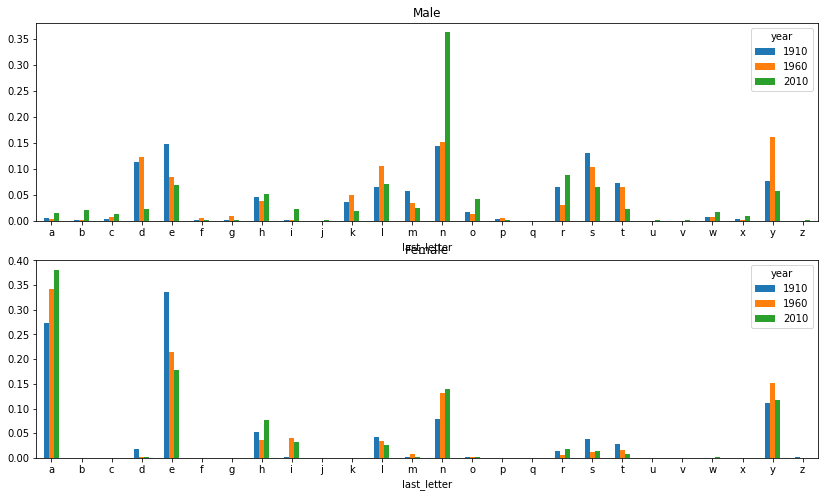

In [227]:
# 이름의 마지막 글자 비율을 각 성별에 따라 연도별로 시각화
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,1,figsize=(14,8)) # 그래프 생성 (위쪽은 Male, 아래쪽은 Female로 추출)
letter_prop['M'].plot(kind='bar',ax=axes[0],title="Male",rot=0) # 상자안에 출력
letter_prop['F'].plot(kind='bar',ax=axes[1],title="Female",rot=0) # 상자안에 출력

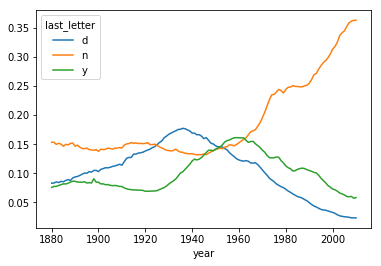

In [235]:
letter_prob=table/table.sum()
# letter_prob에서 남자 중에 d,n,y로 끝나는 이름에 해당하는 데이터 추출
#         d      n      y
# 1880  0.08   0.15   0.05
# ....
# 2010

# letter_prob.loc[['d','n','y'],'M']
dny_ts=letter_prob.loc[['d','n','y'],'M'].T # 반대로 Transport 해보기!
dny_ts.head()
dny_ts.plot() # d/n/y로 끝나는 이름을 가진 남자아이의 출생 비율

In [262]:
# 남자 이름과 여자 이름이 바뀐 경우
top1000

# top1000에서 이름 컬럼만 추출(중복 제거하고)
all_names=top1000.name.unique()
len(all_names) # 6868

# lesley, leslie 등... lesl로 시작하는 이름을 추출
# [방법 1]
# for x in all_names:
#     print(x.lower()) # lower : 대문자를 소문자로 변경


mask=np.array(['lesl' in x.lower() for x in all_names])
# 이름에 lesl이 들어가 있으면 True, 그렇지 않으면 False가 저장
# print(mask)

lesley_like=all_names[mask]
lesley_like


array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

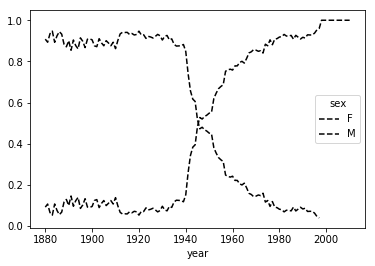

In [269]:
# 5개의 이름별로 출생 수 구하기. 상대도수도 확인
filtered=top1000[top1000.name.isin(lesley_like)] 
# isin : 있으면 True, 없으면 False, top1000으로 전체 구문 묶어주기!

filtered.groupby('name').births.sum() # Leslie 라는 이름이 370429개로 제일 많다

# 성별과 연도별로 데이터를 모은 다음, 출생 연도로 정규화를 함
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum') # 성별로 나눈 births의 합
table=table.div(table.sum(1),axis=0) # 출생년도를 기준으로 
# 1880년의 경우, F:8.0, M:79 인데 table.div(table.sum(1),axis=0)을 수행하면 정규화를 하게 됨
# 따라서 8/(8+79)=0.1, 79/(8+79)=0.9  ----> 합이 1이 되도록


# table
table.plot(style={'F':'k--', "M":'k--'}) # lesl로 시작하는 이름을 가진 남/여 비율 추이, 스타일 줘서 선, 색 변경

In [264]:
# isin 구문 : 열이 list들의 값들을 포함하고 있는 모든 행을 추출할 떄 사용
df=pd.DataFrame({"A":[1,2,3],"B":['a','b','f']})
df[df['A'].isin([1,3,12,'a'])]

,A,B
0,1,a
2,3,f


In [265]:
# isin 적용하기